In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import numpy as np
import model
import matplotlib.pyplot as plt

In [3]:
# Generate data
N = 1000
t_data = [(2*np.pi*k)/(N+1) for k in range(N)]
data = np.array([[np.cos(x), np.sin(x)] for x in t_data])

In [10]:
# Fit data
l = 5
diffMap = model.DiffusionMap(numEigen=l)
diffMap.fit(data, max_dist=9.0)

# Compute accuracy
print(diffMap.acc(data, diffMap.dMap[:,0], diffMap.dMap[:,1]))

0.7986615954890968


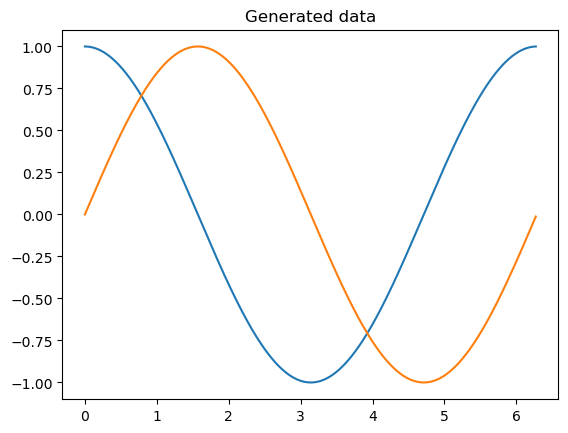

In [5]:
# Fourier data plot
plt.title("Generated data")
plt.plot(t_data, data)

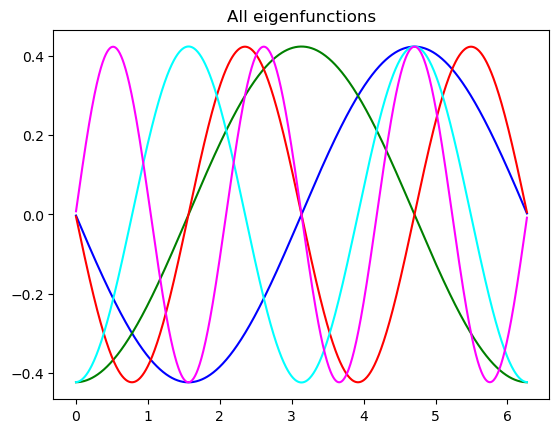

In [6]:
# Plot all Phis
dm = [diffMap.phis[:,x] for x in range(l)]
colorMap = ["blue", "green", "red", "cyan", "magenta"]

plt.title("All eigenfunctions")
for i in range(l):
    plt.plot(t_data, dm[i], color=colorMap[i])

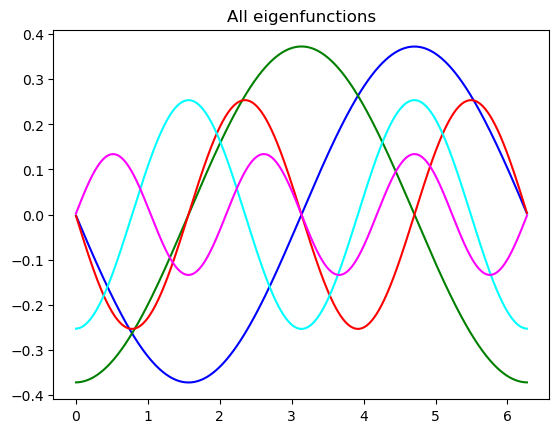

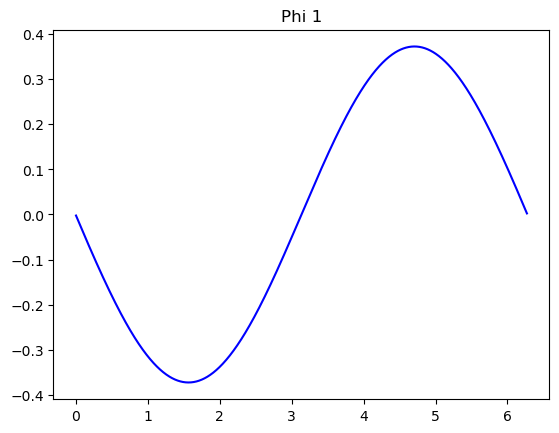

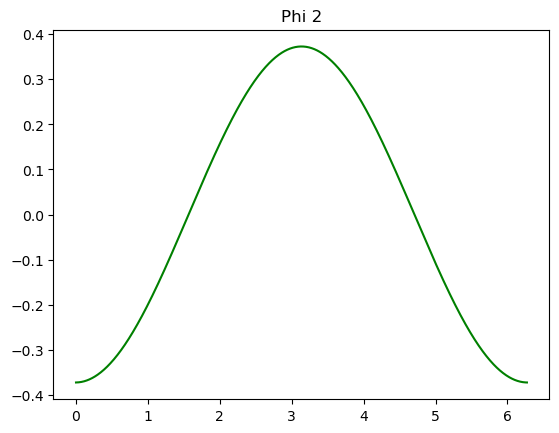

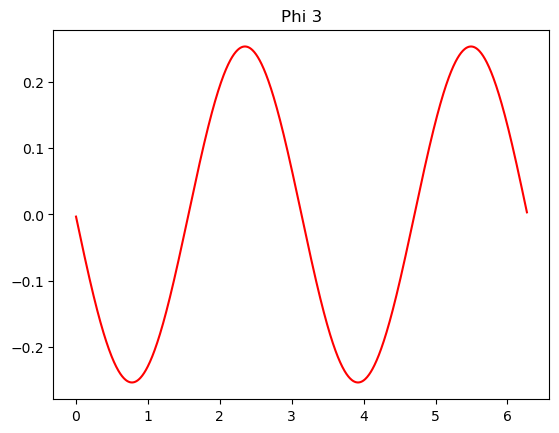

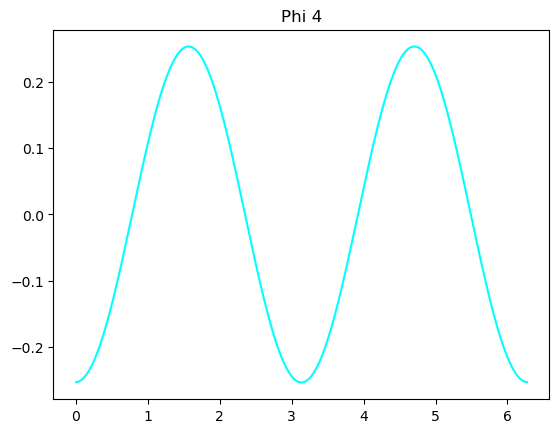

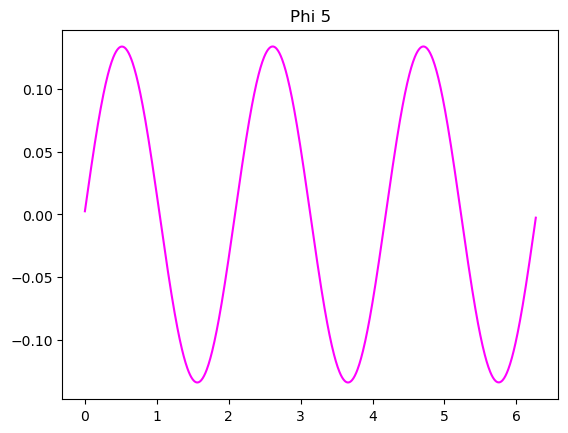

In [7]:
# Plot all
dm = [diffMap.dMap[:,x] for x in range(l)]
colorMap = ["blue", "green", "red", "cyan", "magenta"]

plt.title("All eigenfunctions")
for i in range(l):
    plt.plot(t_data, dm[i], color=colorMap[i])
plt.show()    

# Separate plots
for i in range(l):
    plt.title("Phi {}".format(i+1))
    plt.plot(t_data, dm[i], color=colorMap[i])
    plt.show()

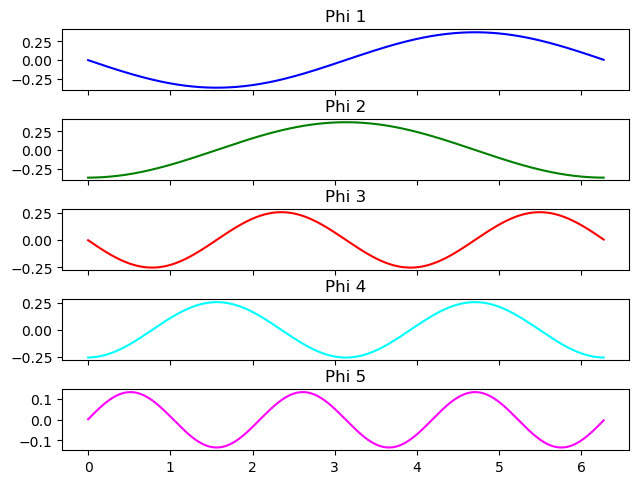

In [8]:
# Separate comparison plots
fig, axs = plt.subplots(l, sharex=True)
fig.tight_layout()
for i in range(l):
    axs[i].set_title("Phi {}".format(i+1))
    axs[i].plot(t_data, dm[i], color=colorMap[i])

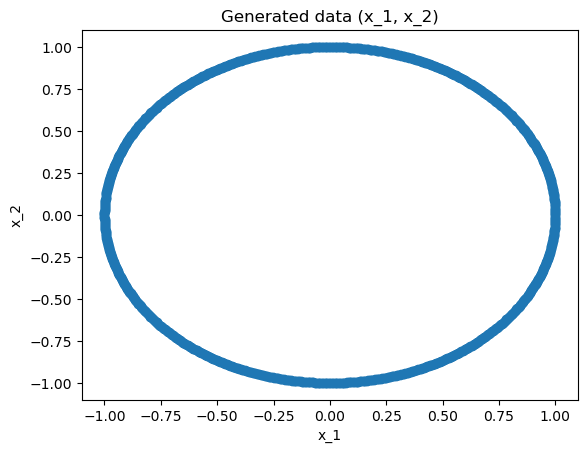

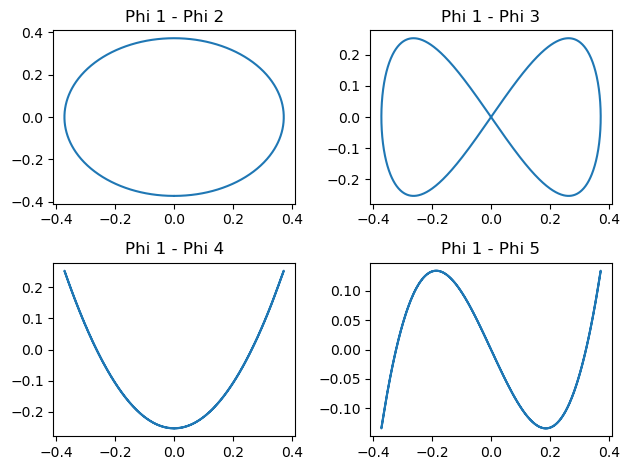

In [9]:
# Fourier data plot geometry
plt.title("Generated data (x_1, x_2)")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.scatter(data[:,0], data[:,1])
plt.show()

# Separate plots of phis against each other
fig, axs = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        axs[i, j].set_title("Phi {} - Phi {}".format(1, 2*i+j+1+1))
        axs[i, j].plot(dm[0], dm[2*i+j+1])
fig.tight_layout()